In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 11.2 Principal Component Analysis (PCA)

In most real-world problems, dataset points are not spread out uniformly across all dimensions. 
Many features are almost constant, while others are highly correlated.
As a result, all points lie within (or close to) a much **lower-dimensional subspace** of the high-dimensional space. 

Principal Component Analysis (PCA) is the oldest and, by far, the most popular algorithm to project a dataset into a low-dimensional subspace.
First, PCA identifies the subspace that lies closest to the data, and then it projects the data onto it.

**Example:** Let us consider the following 2-dimensional dataset

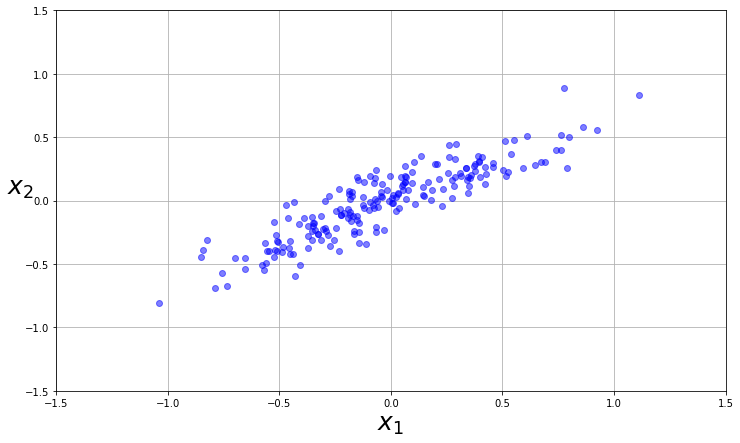

In [2]:
# dataset parameters:
m = 200
angle = np.pi / 5
stretch = 5

# dataset
X = np.random.randn(m, 2) / 10
X[:,0] = stretch*X[:,0]
X = X@np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

plt.figure(figsize=(12,7))
# plot dataset
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)

#
plt.axis([-1.5, 1.5, -1.5, 1.5]) # axes ranges#
plt.xlabel("$x_1$", fontsize=25)
plt.ylabel("$x_2$", fontsize=25, rotation=0)
plt.grid(True)

Suppose we want to project this dataset onto a 1-dimensional subspace (a line).
How do we find the "right line"?

In the plot below, we have our original dataset, along with four different lines (1-dimensional subspaces).
On the right is the result of the projection of the dataset onto each of these lines.

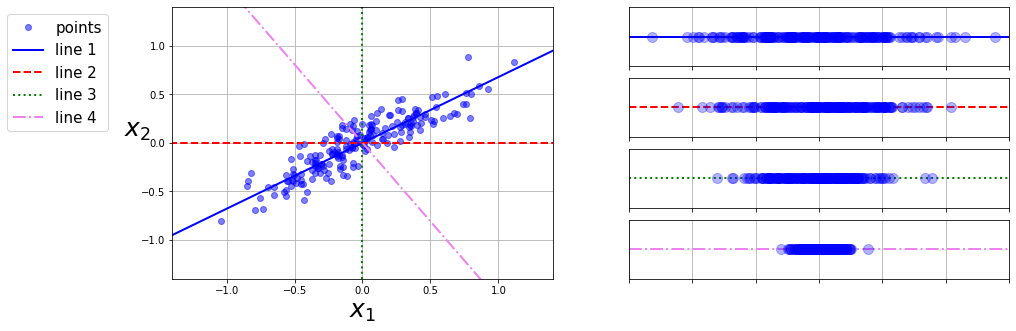

In [3]:
# angles
angle1 = np.pi/5
angle2 = np.pi
angle3 = np.pi/2
angle4 = np.pi-np.pi/3

# unit vectors along the lines
u1 = np.array([np.cos(angle1), np.sin(angle1)])
u2 = np.array([np.cos(angle2), np.sin(angle2)])
u3 = np.array([np.cos(angle3), np.sin(angle3)])
u4 = np.array([np.cos(angle4), np.sin(angle4)])

# projections onto the lines
X_proj1 = X@u1[:,None]
X_proj2 = X@u2[:,None]
X_proj3 = X@u3[:,None]
X_proj4 = X@u4[:,None]

# plot size
plt.figure(figsize=(15,5))

# plot dataset
plt.subplot2grid((4,2), (0, 0), rowspan=4)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5, label = 'points')
plt.axis([-1.4, 1.4, -1.4, 1.4]) # axes ranges#

# plot the lines on the interval [-1.5, 1.5]
plt.plot([-1.5, 1.5], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", color='blue', linewidth=2, label = 'line 1')
plt.plot([-1.5, 1.5], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", color='red', linewidth=2, label = 'line 2')
plt.plot([-1.5, 1.5], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", color='green', linewidth=2, label = 'line 3')
plt.plot([-1.5, 1.5], [-1.4*u4[1]/u4[0], 1.4*u4[1]/u4[0]], "k-.", color='violet', linewidth=2, label = 'line 4')

# plot options
plt.xlabel("$x_1$", fontsize=25)
plt.ylabel("$x_2$", fontsize=25, rotation=0)
plt.legend(fontsize=15, bbox_to_anchor=(-0.15, 1))
plt.grid(True)

# plot projections

# projection 1
plt.subplot2grid((4,2), (0, 1))
plt.plot([-1.5, 1.5], [0, 0], "k-", color='blue', linewidth=2)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", markersize=10, alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-1.5, 1.5, -1, 1])
plt.grid(True)

# projection 2
plt.subplot2grid((4,2), (1, 1))
plt.plot([-1.5, 1.5], [0, 0], "k--", color='red', linewidth=2)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", markersize=10, alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-1.5, 1.5, -1, 1])
plt.grid(True)

# projection 3
plt.subplot2grid((4,2), (2, 1))
plt.plot([-1.5, 1.5], [0, 0], "k:", color='green', linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", markersize=10, alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-1.5, 1.5, -1, 1])
plt.grid(True)

# projection 4
plt.subplot2grid((4,2), (3, 1))
plt.plot([-1.5, 1.5], [0, 0], "k-.", color='violet', linewidth=2)
plt.plot(X_proj4[:, 0], np.zeros(m), "bo", markersize=10, alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-1.5, 1.5, -1, 1])
plt.grid(True)

It seems reasonable to select the line that preserves the maximum amount of variance (in the example, the solid blue line), as it will most likely lose less information than the other projections.
In mathematical terms, we want to select the line that minimizes the mean squared distance between the original dataset and its projection onto the axis.
This is the idea behind PCA.

PCA identifies the line that accounts for the largest amount of variance in the dataset. 
In our previous example, it is the solid blue line.
It also finds a second line, orthogonal to the first one, that accounts for the largest amount of remaining variance.
These axes/lines are called **principal components**.

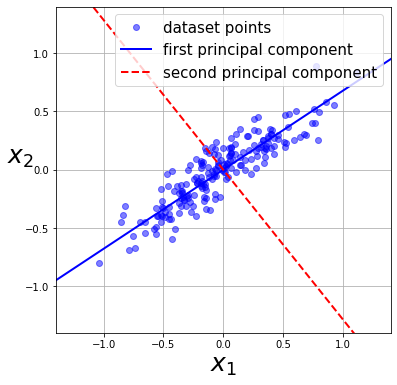

In [4]:
# principal component angles
angle1 = np.pi/5 # first principal component
angle2 = angle1 + np.pi/2 # second principal component


# unit vectors
u1 = np.array([np.cos(angle1), np.sin(angle1)])
u2 = np.array([np.cos(angle2), np.sin(angle2)])

# plot dataset
plt.figure(figsize=(6,6))
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5, label = 'dataset points')
plt.axis([-1.4, 1.4, -1.4, 1.4]) # axes ranges#

# plot principal components
plt.plot([-1.5, 1.5], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", color='blue', linewidth=2, label = 'first principal component')
plt.plot([-1.5, 1.5], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", color='red', linewidth=2, label = 'second principal component')

# plot options
plt.xlabel("$x_1$", fontsize=25)
plt.ylabel("$x_2$", fontsize=25, rotation=0)
plt.legend(fontsize=15, loc='upper right')
plt.grid(True)

If the dataset were a higher-dimensional dataset, PCA would also find a third axis, orthogonal to both previous axes, and a fourth, a fifth, and so on --as many axes as the number of dimensions in the dataset.

### 11.2.1 Principal Components -- The Singular Value Decomposition (SVD)

How can we find the principal components of a dataset? If the dataset is centered around the origin, The **Singular Value Decomposition (SVD)** can find the principal components and the projections onto them!! 

Recall that the SVD of the dataset matrix $X$ decomposes $X$ as the product of three matrices

$$
X = U\Sigma V.
$$

The matrix $U$ has orthonormal columns, the matrix $V$ has orthonormal rows, and the matrix $\Sigma$ is diagonal. The diagonal elements of $\Sigma$ are called the singular values of $X$.
You can find the svd of a matrix by using NumPy's svd function.

In [5]:
u,s,v = np.linalg.svd(X)

Here is an amazing fact. 
The rows of $V$ are the principal components: row 1 is the first principal component, row 2 is the second principal component, row 3 is the third principal component, and so on.

The projection of $X$ onto the subspace spanned by the first $k$ principal components is:

In [6]:
k = 2
X_reduced = X@v[:k].T

**Example:** Let us consider the following 3-dimensional dataset

(-1.0, 1.0)

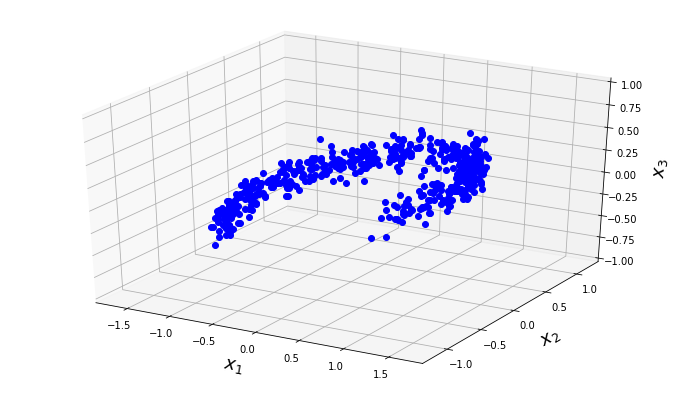

In [7]:
# build the 3d dataset
m = 500
w1, w2 = 0.1, 0.3
noise = 0.1
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]


angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m) # the z-components are almost a linear combination of the x and y components

# plot the dataset
from mpl_toolkits.mplot3d import proj3d
plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
plt.plot(X[:,0],X[:,1],X[:,2],'bo')

ax.set_xlabel("$x_1$", fontsize=18, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=10)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=10)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

All the points lie close to a plane (although it's not evident from the image itself). Let us use PCA to find this plane and project every point onto it.

In [8]:
'PCA'

# center the dataset
X_centered = X - np.mean(X,axis=0)

# Singular Value Decomposition
u,s,v = np.linalg.svd(X_centered)

# principal components
c1 = v[:,0] # first principal component
c2 = v[:,1] # second principal component

Let us plot the plane spanned by the first two principal components

(-1.0, 1.0)

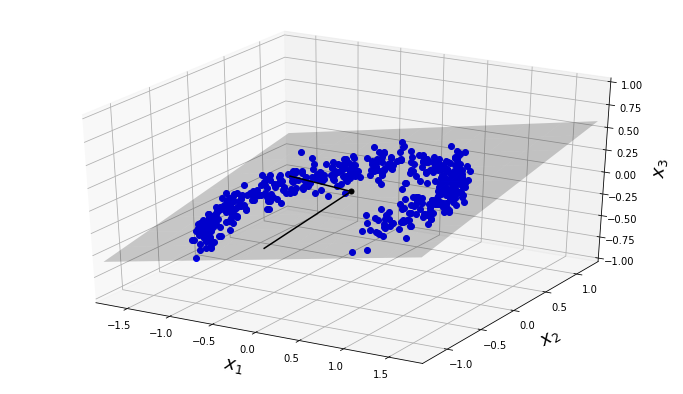

In [9]:
# plot the centered dataset
plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
plt.plot(X_centered[:,0],X_centered[:,1],X_centered[:,2],'bo')

# orition
ax.plot([0],[0],[0],'ko',markersize=5)

# plot c1 and c2
ax.plot([0,c1[0]],[0,c1[1]],[0,c1[2]],'k-')
ax.plot([0,c2[0]],[0,c2[1]],[0,c2[2]],'k-')

# plot the plane
x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)
n = np.cross(c1,c2) # plane's normal vector
x3 = -(n[0]*x1+n[0]*x2)/n[2]
ax.plot_surface(x1, x2, x3, alpha=0.2, color="k")

# plot options
ax.set_xlabel("$x_1$", fontsize=18, labelpad=10) # axes labels
ax.set_ylabel("$x_2$", fontsize=18, labelpad=10)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=10)
ax.set_xlim(axes[0:2]) # axes limits
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

Finally, let us project the dataset onto the plane spanned by the first two principal components.

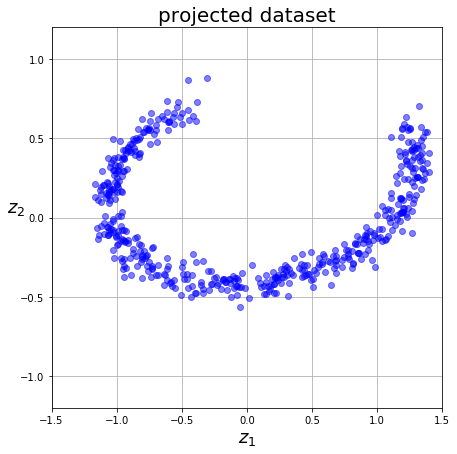

In [11]:
# projection
k = 2
X_reduced = X_centered@v[:k].T

# plot the projected dataset
plt.figure(figsize=(7,7))
plt.plot(X_reduced[:,0],X_reduced[:,1],'bo',alpha=0.5)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.axis([-1.5, 1.5, -1.2, 1.2])
plt.title('projected dataset',fontsize=20)
plt.grid(True)

We have just reduced the dataset's dimensionality from 3D to 2D, without losing too much information.

### 11.2.2 Choosing the Right Number of Dimensions

Let us load the MNist dataset

In [12]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"][:5000] # we'll use the first 5000 digits 
y = mnist["target"][:5000]

In [13]:
y = y.astype(np.uint8)

In [14]:
m,n = X.shape
print('the dimension of the data set is '+str(n))

the dimension of the data set is 784


and compute its principal components

In [15]:
X_centered = X - np.mean(X,axis=0)
u,s,v = np.linalg.svd(X_centered,full_matrices=False) # full_matrices = False will save some memory

The singular values produced are in order from largest to smallest

Text(0.5, 1.0, 'singular values of the MNist Dataset')

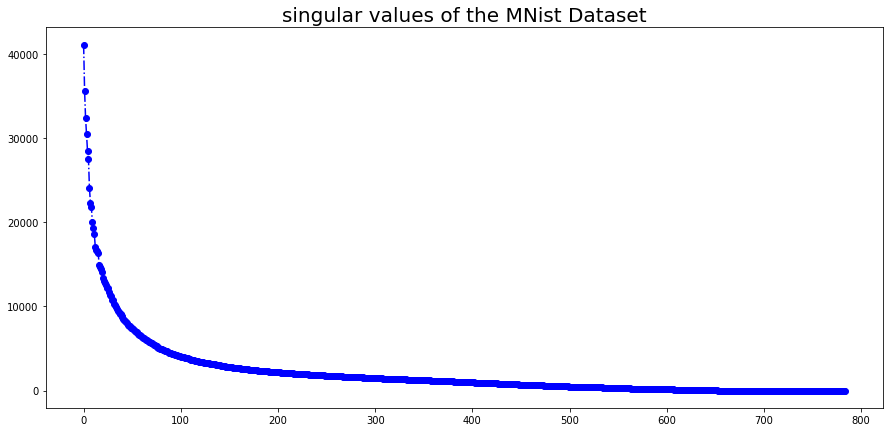

In [16]:
plt.figure(figsize=(15,7))
plt.plot(s,'bo-.')
plt.title('singular values of the MNist Dataset',fontsize=20)

and when squared are proportional to the amount of variance explained by a given principal component

In [17]:
# explained variance
s_squared = np.square(s)
explained_variance = np.array([np.sum(s_squared[:k])/np.sum(np.square(s)) for k in range(n)])

Text(0, 0.5, 'explained variance')

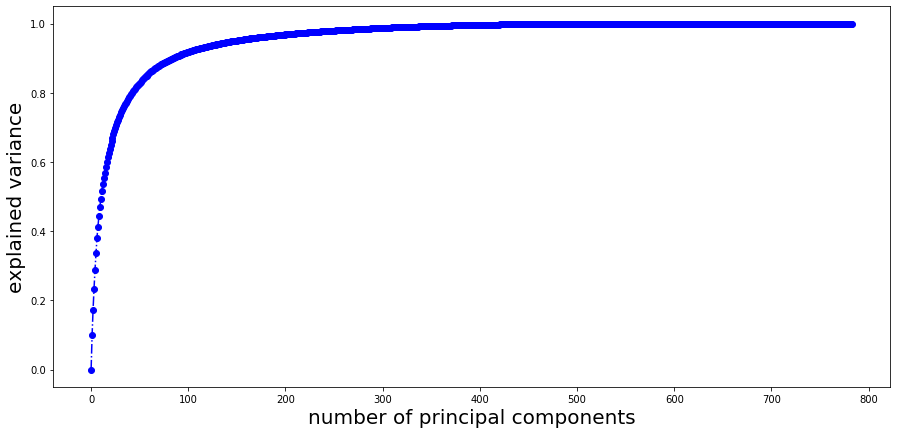

In [18]:
plt.figure(figsize=(15,7))
plt.plot(explained_variance,'bo-.')
plt.xlabel('number of principal components', fontsize=20)
plt.ylabel('explained variance', fontsize=20)

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is simple to choose the number of dimensions that add up to a sufficiently large portion of the variance (for example, 95%).

In our example, reducing the dimensionality down to about $k=150$ wouldn't lose too much explained variance.

In [19]:
explained_variance[150]

0.9510446077847862

Another option is to plot the explained variance as a function of the number of dimensions. 
There will usually be an elbow in the curve, where the explained variance stops growing fast:

Text(0, 0.5, 'explained variance')

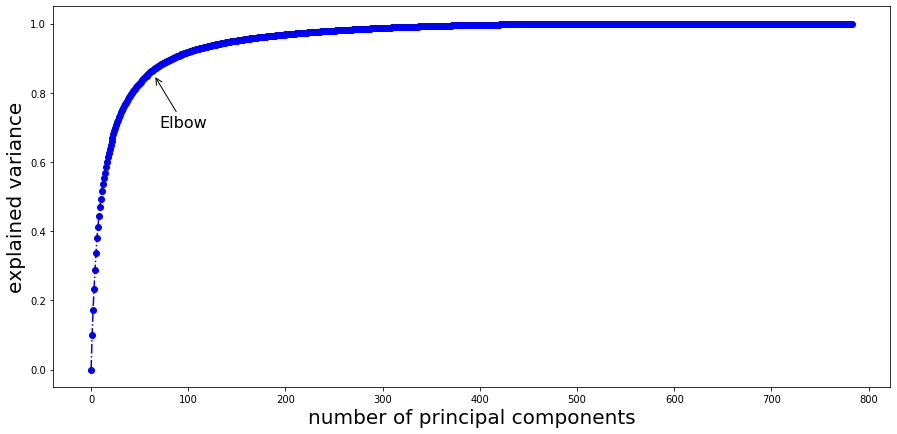

In [20]:
plt.figure(figsize=(15,7))
plt.plot(explained_variance,'bo-.')
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.xlabel('number of principal components', fontsize=20)
plt.ylabel('explained variance', fontsize=20)

### 11.2.3 PCA for Visualization

PCA can also be used to visualize high-dimensional data. 

Let's visualize the MNIST dataset

**two-dimensional visualization**

In [21]:
k = 2 # two-dimensional visualization 
X_reduced = X_centered@v[:k].T

Text(0.5, 1.0, 'two-dimensional visualization of the MNist dataset')

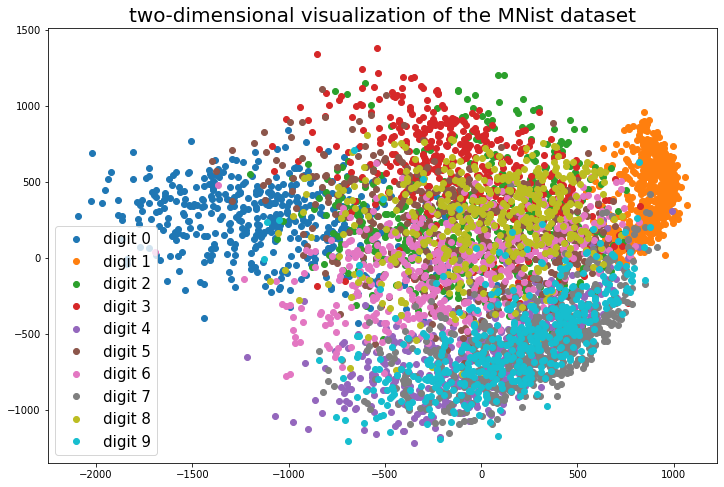

In [22]:
import matplotlib.cm as cm
colors = cm.tab10(np.linspace(0, 1, 10))

plt.figure(figsize=(12,8))
for i in range(10):
    plt.plot(X_reduced[y==i,0],X_reduced[y==i,1],'o',color=colors[i],label='digit '+str(i))
    plt.legend(fontsize=15)
plt.title('two-dimensional visualization of the MNist dataset',fontsize=20)

Observe that some of the digits (for example, digits 0, 1 and 3) are separated from the other digits.

**three-dimensional visualization**

In [23]:
k = 3 # three-dimensional visualization 
X_reduced = X@v[:k].T

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0.5, 0.92, 'three-dimensional visualization of the MNist dataset')

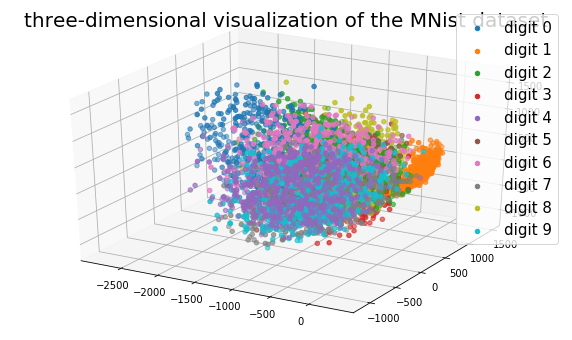

In [24]:
colors = cm.tab10(np.linspace(0, 1, 10))
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
for i in range(10):
    ax.scatter(X_reduced[y==i,0],X_reduced[y==i,1],X_reduced[y==i,2],c=colors[i], label='digit '+str(i))
    plt.legend(fontsize=15)
plt.title('three-dimensional visualization of the MNist dataset',fontsize=20)

### 11.2.4 PCA for Speeding-up Clustering

First, let us load the Olivetti dataset

In [25]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

In [26]:
images, labels = olivetti.images, olivetti.target

In [27]:
X = images.reshape(400,64*64)
print('the dimension of the data set is '+str(n))

the dimension of the data set is 784


We are going to cluster the dataset by using k-means. 
To speed up the algorithm, we will reduce the dataset's dimensionality (using PCA, preserving 95% of the variance).

In [28]:
'PCA'

# center the dataset
X_centered = X - np.mean(X,axis=0)
# svd
u,s,v = np.linalg.svd(X_centered,full_matrices=False) # full_matrices = False will save some memory
# explaned variance
s_squared = np.square(s)
explained_variance = np.array([np.sum(s_squared[:k])/np.sum(np.square(s)) for k in range(n)])

Text(0, 0.5, 'explained variance')

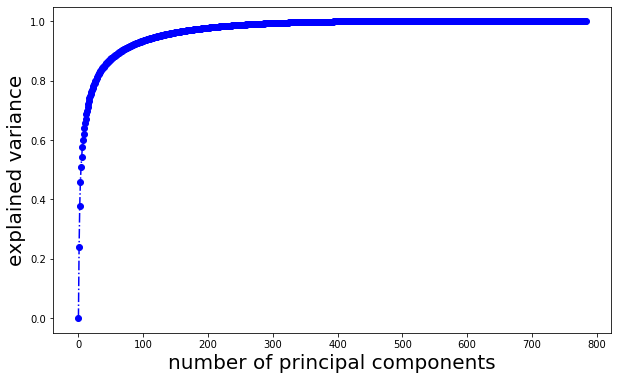

In [29]:
plt.figure(figsize=(10,6))
plt.plot(explained_variance,'bo-.')
plt.xlabel('number of principal components', fontsize=20)
plt.ylabel('explained variance', fontsize=20)

Reducing the dimensionality down to about  𝑘=150  wouldn't lose too much explained variance.

In [30]:
explained_variance[150]

0.9632106

In [31]:
k = 150 # three-dimensional visualization 
X_reduced = X@v[:k].T
X_reduced.shape

(400, 150)

Finally, we can cluster the projected dataset by using Hierarchical Clustering.

In [32]:
def k_means(X,k,max_it=1000000):   
    it = 0 
    m,n = X.shape #dataset size, number of features
    repeat = True 
    'random initialization of clusters'
    clusters = np.random.randint(k,size=len(X)) # random assignment
    'means initialization'
    means = np.zeros((k,n))
    while repeat and it<=max_it: # repeat until clusters do not change or iterations > max_it
        it = it + 1
        'step 1: update means'
        for i in range(k):
            if len(X[clusters==i])!=0:
                means[i] = np.mean(X[clusters==i],axis=0)
            else: # if any of the cluster centers has no data points associated with it, replace it with a random data point
                idx = np.random.randint(m)
                means[i] = X[idx]
        'step 2: update clusters'
        new_clusters = np.argmin(np.array([np.linalg.norm(X-means[i],axis=1) for i in range(k)]),axis=0)        
        'check whether clusters and new_clusters are equal or not'
        if sum(clusters!=new_clusters)==0:
            repeat = False
        clusters = new_clusters
    return clusters, means

def inertia(X,k,clusters,means):
    m = X.shape[0] #dataset size
    inertia = 0
    for i in range(k): # iterate over clusters
        distances = np.square(np.linalg.norm(X[clusters==i]-means[i],axis=1)) # distances from points in cluster i to cluster i mean
        inertia = inertia + np.sum(distances)
    inertia = inertia/m
    return inertia

In [33]:
'run k-means with different values for k'
largest_k = 200
k_list = [k+1 for k in range(largest_k)] # [1,2,3,...,largest_k]
inertia_list = []
for k in k_list:
    if k % 10 == 0:
        print(k)
    clusters, means = k_means(X_reduced,k)
    inertia_list.append(inertia(X_reduced,k,clusters,means))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


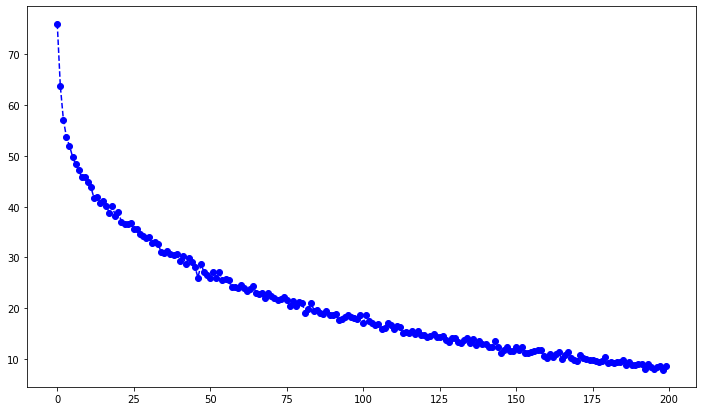

In [34]:
plt.figure(figsize=(12,7))
plt.plot(inertia_list,'bo--')

The optimal number of clusters is not clear on this inertia diagram, as there is no obvious elbow, so let's take k=100

In [35]:
k_best = 100
clusters,_ = k_means(X_reduced, k = k_best)

Let us visualize the clusters

Cluster 0


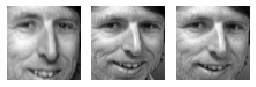

Cluster 1


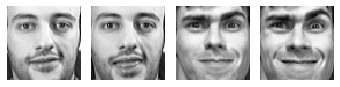

Cluster 2


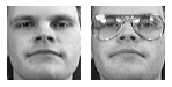

Cluster 3


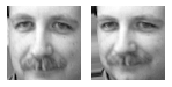

Cluster 4


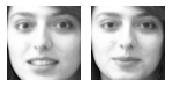

Cluster 5


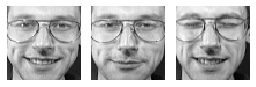

Cluster 6


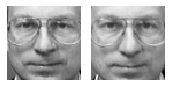

Cluster 7


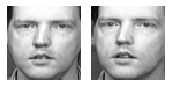

Cluster 8


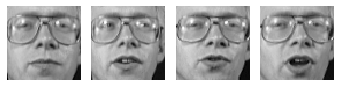

Cluster 9


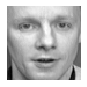

Cluster 10


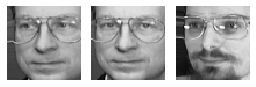

Cluster 11


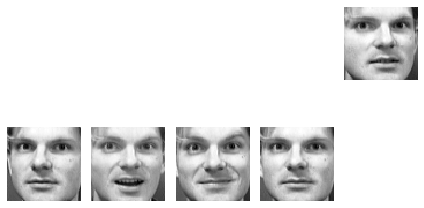

Cluster 12


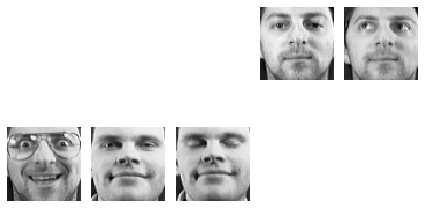

Cluster 13


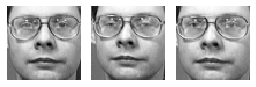

Cluster 14


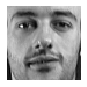

Cluster 15


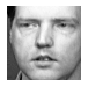

Cluster 16


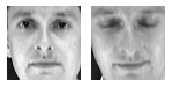

Cluster 17


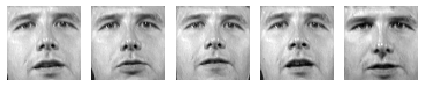

Cluster 18


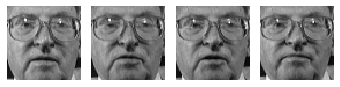

Cluster 19


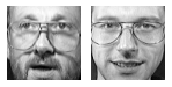

Cluster 20


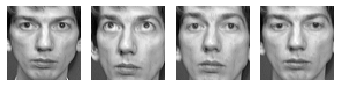

Cluster 21


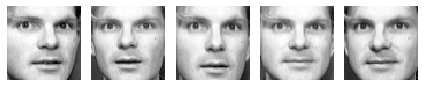

Cluster 22


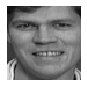

Cluster 23


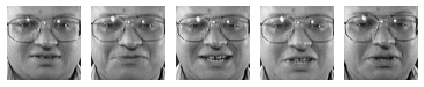

Cluster 24


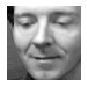

Cluster 25


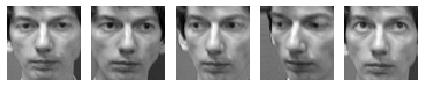

Cluster 26


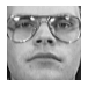

Cluster 27


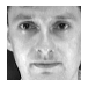

Cluster 28


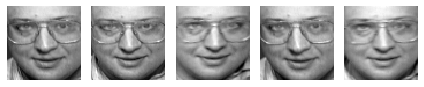

Cluster 29


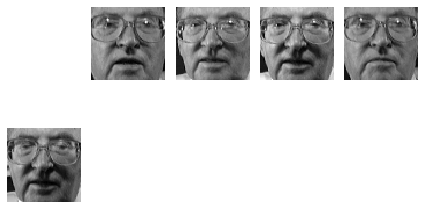

Cluster 30


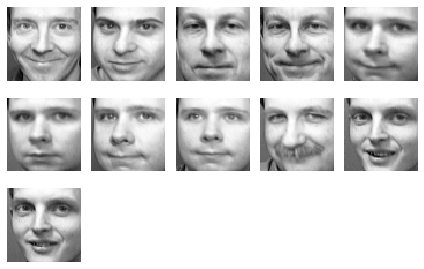

Cluster 31


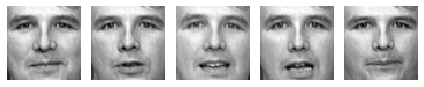

Cluster 32


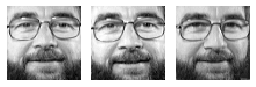

Cluster 33


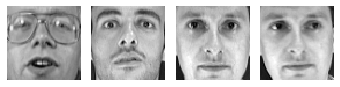

Cluster 34


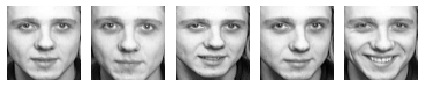

Cluster 35


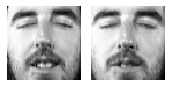

Cluster 36


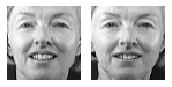

Cluster 37


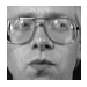

Cluster 38


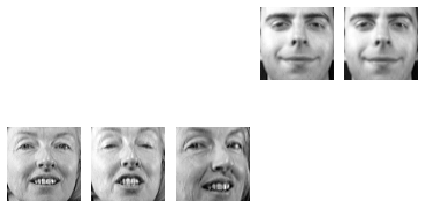

Cluster 39


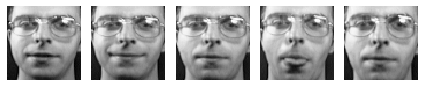

Cluster 40


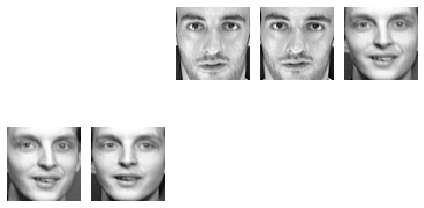

Cluster 41


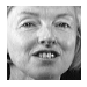

Cluster 42


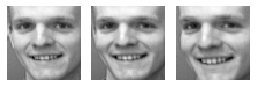

Cluster 43


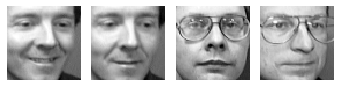

Cluster 44


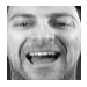

Cluster 45


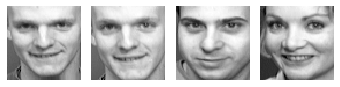

Cluster 46


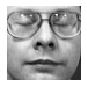

Cluster 47


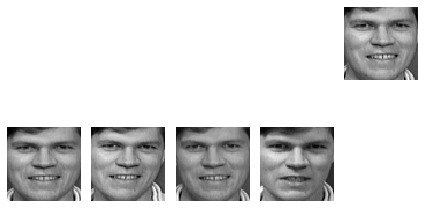

Cluster 48


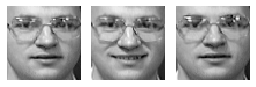

Cluster 49


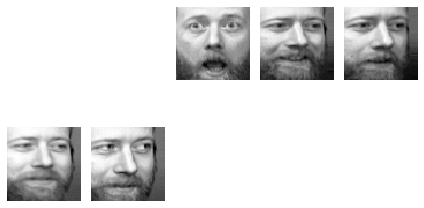

Cluster 50


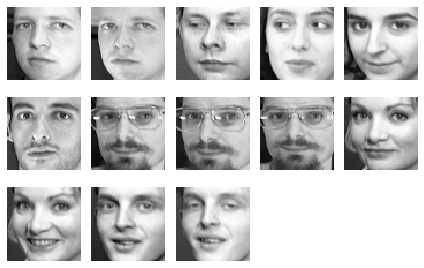

Cluster 51


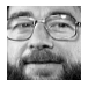

Cluster 52


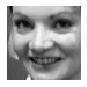

Cluster 53


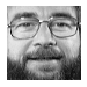

Cluster 54


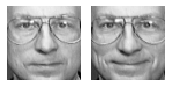

Cluster 55


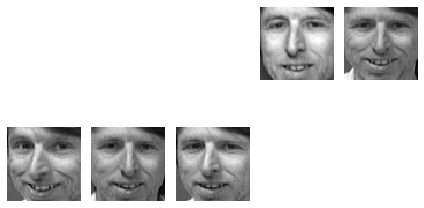

Cluster 56


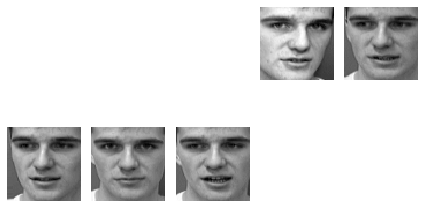

Cluster 57


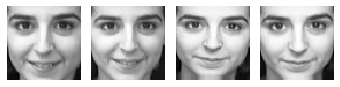

Cluster 58


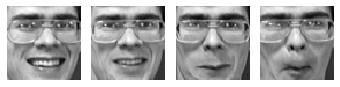

Cluster 59


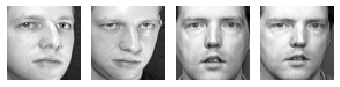

Cluster 60


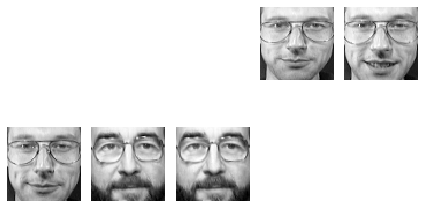

Cluster 61


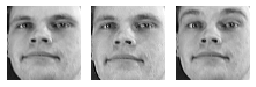

Cluster 62


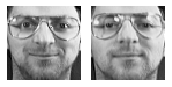

Cluster 63


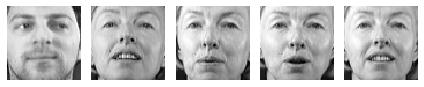

Cluster 64


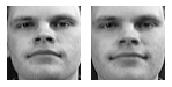

Cluster 65


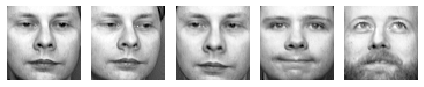

Cluster 66


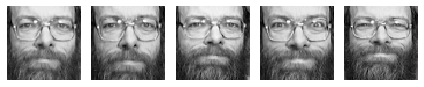

Cluster 67


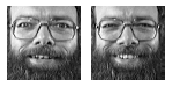

Cluster 68


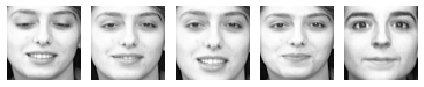

Cluster 69


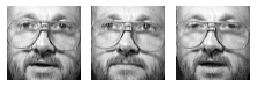

Cluster 70


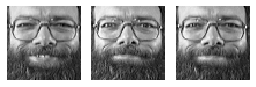

Cluster 71


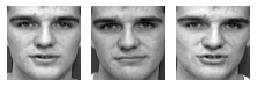

Cluster 72


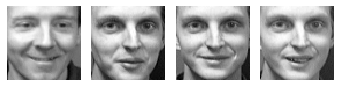

Cluster 73


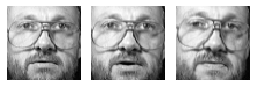

Cluster 74


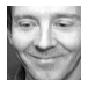

Cluster 75


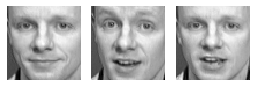

Cluster 76


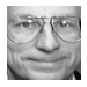

Cluster 77


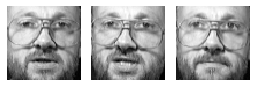

Cluster 78


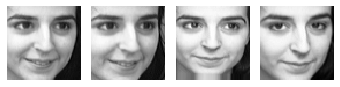

Cluster 79


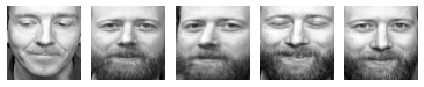

Cluster 80


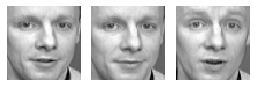

Cluster 81


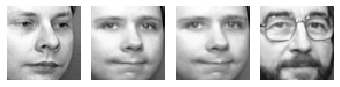

Cluster 82


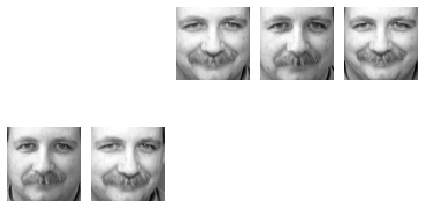

Cluster 83


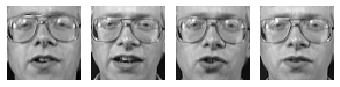

Cluster 84


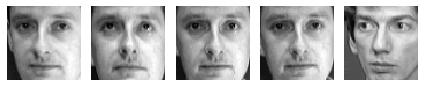

Cluster 85


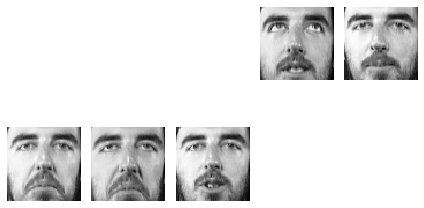

Cluster 86


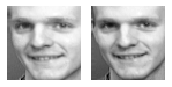

Cluster 87


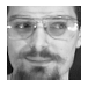

Cluster 88


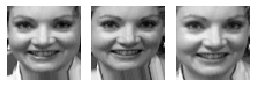

Cluster 89


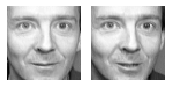

Cluster 90


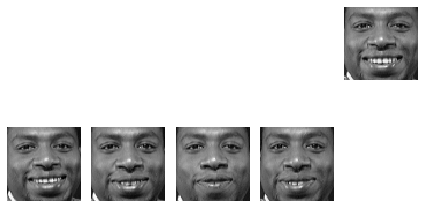

Cluster 91


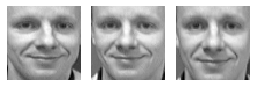

Cluster 92


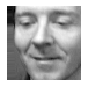

Cluster 93


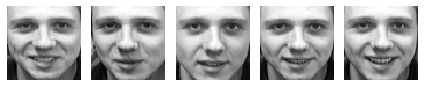

Cluster 94


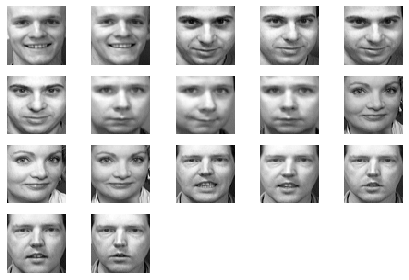

Cluster 95


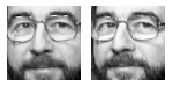

Cluster 96


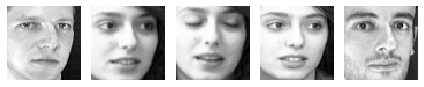

Cluster 97


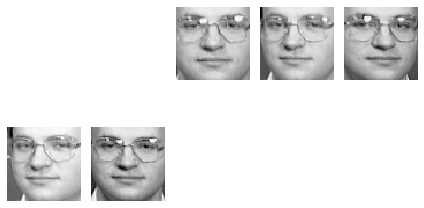

Cluster 98


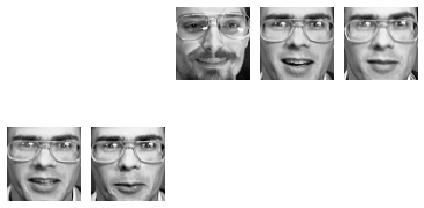

Cluster 99


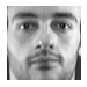

In [36]:
for i in range(k_best):
    print("Cluster", i)
    n_faces = sum(clusters==i)
    n_cols = 5
    n_rows = (n_faces - 1) // n_cols + 1
    cluster_faces = X[clusters==i]
    #plt.figure(figsize=(10,10))
    for j in range(n_faces):
        face = cluster_faces[j].reshape(64,64)
        plt.subplot(n_rows, n_cols,j+1)
        plt.imshow(face,cmap='gray')
        plt.axis('off')
        plt.tight_layout()
    plt.show()

You should see similar faces in each cluster